In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.20.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
import keras

In [9]:
classifier = Sequential()

In [10]:
classifier.add(Dense(units=11,activation='relu'))

In [11]:
classifier.add(Dense(units=6,activation='relu'))

In [12]:
classifier.add(Dense(units=1,activation='relu'))

In [13]:
early_stop=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [14]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stop)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7533 - loss: 1.5197 - val_accuracy: 0.7641 - val_loss: 1.1991
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7792 - loss: 0.8485 - val_accuracy: 0.7842 - val_loss: 0.6339
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7903 - loss: 0.5366 - val_accuracy: 0.7940 - val_loss: 0.4764
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8037 - loss: 0.4715 - val_accuracy: 0.7986 - val_loss: 0.4692
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8110 - loss: 0.4557 - val_accuracy: 0.8046 - val_loss: 0.4634
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8149 - loss: 0.4428 - val_accuracy: 0.8061 - val_loss: 0.4545
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8210 - loss: 0.4319 - val_accuracy: 0.8133 - val_loss: 0.4548


In [18]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


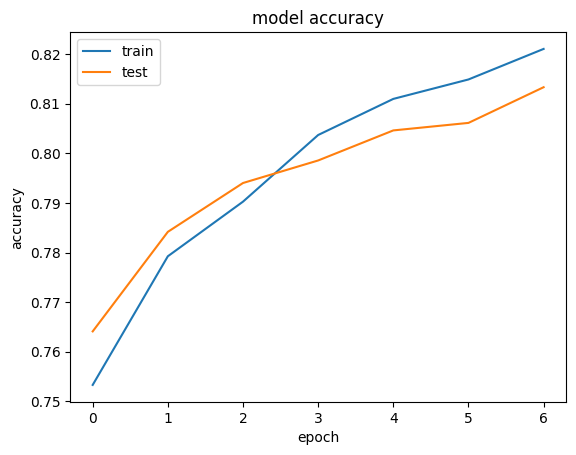

In [19]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

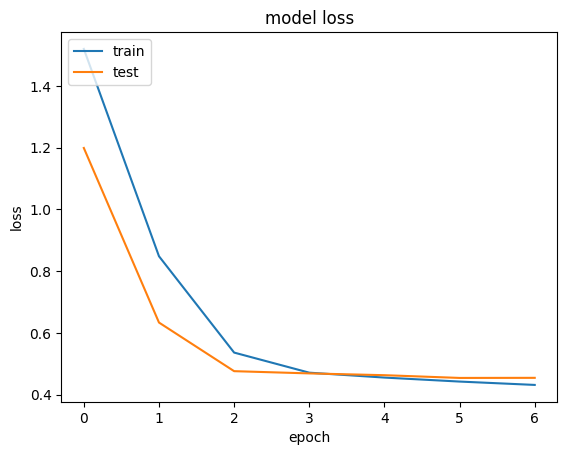

In [20]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1557,   38],
       [ 298,  107]])

In [23]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [24]:
score

0.832